Один из трех блоков ниже выбирается для исследования экситонных волновых функций в одном из потенциалов с известными калибровочными положениями экситонных пиков поглощения в спектре. В блоках заданы параметры потенциала Кронига-Пенни $a,b,V_0$:

\begin{equation}
V_{KP}(x) =
\begin{cases}
   0 & \text{0 < x < a}\\
   V_0 & \text{-b < x < 0},
\end{cases}
\label{eqn:KronigPenny}
\end{equation}

 величины разбиения первой зоны Бриллюэна и элементарной ячейки $N, N_r$, а также параметры в ядрах и формуле построения оптического спектра

In [18]:
a = 3.             #width of a well
b = 3.             #width of a barrier
V = 1.0             #height of a barrier
N = 751               #fragmentation of Brillouin zone from 0 to pi/(a+b)
N_r = 81                   #fragmentation of lattice (for counting integrals in F)
A_SC = 0.955*0.905                #parameter in SC kernel
alph = 0.01                #another parameter in SC
A_cont = 3.77*0.89             #parameter in contact kernel
A_LR = 6.2               #parameter in long-range kernel
q = 0.024                #small but finite parameter in exp for spectra counting
eta = 0.0035            #blur of spectra peaks
fr_end = 0.4            #maximum frequency in spectra graph

In [153]:
a = 0.5
b = 0.5 
V = 20.0  
N = 451 
N_r = 80 
A_SC = 2.39*4.1
alph = 0.01 
A_cont = 10.   
A_LR = 18.4
q = 0.7
eta = 0.08
fr_end = 5.

In [181]:
a = 2.6 
b = 0.4 
V = 8.0  
N = 451 
N_r = 90
A_SC = 0.898*1.4
alph = 0.01
A_cont = 3.7*0.96
A_LR = 6.02
q = 0.03
eta = 0.009
fr_end = 2.

In [19]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.integrate import simps
from scipy.integrate import trapz
import cmath
Volume = numpy.sqrt(N)*(a+b)
E_k = lambda E: (cmath.cos(cmath.sqrt(2*E)*a) * cmath.cosh(b * cmath.sqrt(2 * V - 2 * E)) + \
                   (V / (2*E) - 1.) / cmath.sqrt(V/E - 1.) * cmath.sinh(cmath.sqrt(2*V - 2*E)*b) * \
                    cmath.sin(cmath.sqrt(2*E)*a) - cmath.cos(k * (a+b))).real
k_map = numpy.linspace(-numpy.pi/(a+b),numpy.pi/(a+b),N)
r_map = numpy.linspace(-b,a,N_r)
for i in range (0, N_r):
    if (r_map[i]<=0):
        N_0 = i
h = r_map[1] - r_map[0]

Дисперсионное соотношение среды:

\begin{equation}
cos (k(a+b)) = cos (\sqrt{2 \epsilon} a) ch (\sqrt{2\epsilon - 2 V_0} b) + \frac{\frac{V_0}{2\epsilon} - 1}{\sqrt{ \frac{V}{\epsilon} - 1}} sin (\sqrt{2 \epsilon} a) sh (\sqrt{2\epsilon - 2 V_0} b) .
\end{equation}

приводит к существованию разрешенных для заселения электронами зон только в случаях, когда правая часть уравнения по модулю не превышает 1, что обеспечивает наличие действительных решений $cos (k(a+b))$. Это условие и проверяется в блоке ниже. 

В массив E_border записываются граничные энергии зон (самая маленькая и самая большая энергия первых трех зон), а в E_map записываются энергии в первых трех зонах для каждого из значений разбиения первой зоны Бриллюэна k_map

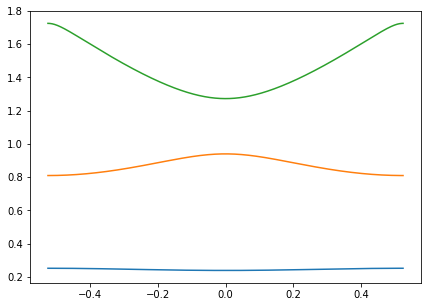

In [20]:
plt.rcParams['figure.figsize'] = [7,5]
Func = lambda E: cmath.cos(cmath.sqrt(2*E)*a) * cmath.cosh(b * cmath.sqrt(2 * V - 2 * E)) + \
                   (V / (2*E) - 1.) / cmath.sqrt(V/E - 1.) * cmath.sinh(cmath.sqrt(2*V - 2*E)*b) * \
                    cmath.sin(cmath.sqrt(2*E)*a)
E_border = numpy.zeros(6)
E_map = numpy.zeros((N,3))
e = 0.; zone = 0; checker = False
while zone < 3:
    e = e + V/1000.
    if abs(Func(e))<=1 and checker == False:
        E_border[2*zone] = e
        checker = True
    if abs(Func(e))>1 and checker == True:
        E_border[2*zone+1] = e - V/1000.
        checker = False
        zone = zone + 1
fig,ax = plt.subplots()
for zone in range (0,3):
    for i in range (0,N):
        k = k_map[i]
        l = opt.fsolve(E_k, (E_border[2*zone+1] + E_border[2*zone])/2.)
        E_map[i,zone] = l[0]
    ax.plot(k_map, E_map[:,zone])
plt.show()

Выше приведена зонная структура моделируемой квазиодномерной среды.

В следующем блоке считаются значения стационарной волновой функции $\phi_k(x)$ в узловых точках по ячейке прямой и обратной решетки.

Волновые функции представлены в блоховской форме:

\begin{equation}
    \phi_k(x) = e^{ikx} u_k(x),
\end{equation}
где $u_k(x)$ - функция, периодическая по решетке.

Также запишем одночастичное уравнение Шредингера - уравнение Кона-Шэма на стационарные орбитали системы в основном состоянии:

\begin{equation}
    i \frac{\partial \psi_j(\mathbf{r},t)}{\partial t} = [-\frac{\nabla^2}{2} + V_{KP}(\mathbf{r},t)] \psi_j(\mathbf{r},t).
    \label{eqn:KS_tddft}
\end{equation}

Решая дифференциальное уравнение Шредингера с волновыми функциями в соответствии с теоремой Блоха, можно получить условие на функцию $\phi_k(x)$:

\begin{equation}
\phi_k(x) =
\begin{cases}
   A_1 e^{-i \sqrt{2\epsilon} x} + B_1 e^{i \sqrt{2\epsilon} x} & \text{0 < x < a}\\
   A_2 e^{-i \sqrt{2\epsilon-2V_0} x} + B_2 e^{i \sqrt{2\epsilon-2V_0} x} & \text{-b < x < 0},
 \end{cases}
\label{eqn:WF}
\end{equation}
где $\epsilon$ - энергия рассматриваемой частицы в потенциале Кронига-Пенни.

Константы $A_{1,2}$ и $B_{1,2}$ находятся из условий периодичности функции $u_k(x)$: волновая функция $\psi_k(x)$ и ее производная $\frac{d \psi_k(x)}{dx}$ сшиваются на границах $x = 0$ и $x = a;-b$ с учетом фазового множителя $e^{ikL}$. В результате сшивки получаем однородную систему линейных алгебраических уравнений на коэффициенты $A_{1,2}$, $B_{1,2}$.

In [21]:
#alternatively counts fi(x) for intermideate coordinates
fi = numpy.zeros((N_r,N,2),dtype = complex)
fi_alt = numpy.zeros((N_r-1,N,2),dtype = complex)
opt = numpy.zeros((N,4),dtype = complex)
r_map_alt = r_map[:-1] + h/2.
for i in range (0, N_r-1):
    if (r_map[i]<=0.):
        N_0_alt = i
X_full = [[],[]]
for zone in range (0,2):
    opt[:,zone] = numpy.sqrt(2.*E_map[:,zone+1])
    opt[:,zone+2] = numpy.sqrt(2.*(E_map[:,zone+1] - V), dtype=complex)
for z in range (0,2):
    for i in range (0,N):
        k = k_map[i]
        A = numpy.array([[1.,1.,-1.],[-opt[i,z],opt[i,z],opt[i,z+2]],[cmath.exp(-1.j*k*(a+b)-1.j*a*opt[i,z]),\
                            cmath.exp(-1.j*k*(a+b)+1.j*a*opt[i,z]),-cmath.exp(1.j*opt[i,z+2]*b)]],dtype=complex)
        B = numpy.array([1.,opt[i,z+2],cmath.exp(-1.j*opt[i,z+2]*b)],dtype=complex)
        X=numpy.linalg.solve(A,B)
        X = numpy.append(X[:], [1.])
        X_full[z].append(X)
X_full = numpy.array(X_full)
for z in range (0,2):
    for x in range (0,N_0):
        fi[x,:,z] = X_full[z,:,2]*numpy.exp(-1.j*opt[:,z+2]*r_map[x],dtype=complex)+\
            X_full[z,:,3]*numpy.exp(1.j*opt[:,z+2]*r_map[x],dtype=complex)
    for x in range (0,N_0_alt):
        fi_alt[x,:,z] = X_full[z,:,2]*numpy.exp(-1.j*opt[:,z+2]*r_map_alt[x],dtype=complex)+\
            X_full[z,:,3]*numpy.exp(1.j*opt[:,z+2]*r_map_alt[x],dtype=complex)
    for x in range (N_0,N_r):
        fi[x,:,z] = X_full[z,:,0]*numpy.exp(-1.j*opt[:,z]*r_map[x],dtype=complex)+\
            X_full[z,:,1]*numpy.exp(1.j*opt[:,z]*r_map[x],dtype=complex)
    for x in range (N_0_alt,N_r-1):
        fi_alt[x,:,z] = X_full[z,:,0]*numpy.exp(-1.j*opt[:,z]*r_map_alt[x],dtype=complex)+\
            X_full[z,:,1]*numpy.exp(1.j*opt[:,z]*r_map_alt[x],dtype=complex)
    for i in range (0,N):
        norm = simps(abs(fi[:,i,z])**2,x=None,dx=h)
        fi[:,i,z] = fi[:,i,z] * cmath.sqrt((a+b)/norm)
        norm = simps(abs(fi_alt[:,i,z])**2,x=None,dx=h)
        fi_alt[:,i,z] = fi_alt[:,i,z] * cmath.sqrt((a+b)/norm)

Этот блок считает $F^{vcvc}$ посредством использующихсяядер: Сглаженного кулоновского (Soft-Colomb), контактного (contact) и дальнодействующего (Long-range), определенных следующими выражениями:

\begin{equation}
    f_{xc}^{SC}(r,r',\omega) = - \frac{A^{SC}}{\sqrt{(r-r')^2 + \alpha}}
\end{equation}
,

\begin{equation}
    f_{xc}^{cont} = -A^{cont} \delta(r-r')
\end{equation}
,

\begin{equation}
    f_{xc}^{LR} = - \frac{A^{LR}}{4\pi |r-r'|}
\end{equation}
,
где параметр $A^{LR}$ привязан к материалу среды и относится к статической диэлектрической проницаемости среды.

От сингулярностей в дальнодействующем LR ядре мы избавляемся с помощью применения двух наборов дискретизаций волновых функций и разбиений прямой ячейки - различающихся друг с другом на d/2, где d - шаг дискретизации прямой решетки.

Далее ядра подставляются в интегральное матричное выражение:

\begin{equation}
    F_{\mathbf{kq}}^{ijmn} (\omega)= \frac{2}{N \Omega_0^2} \int_{\Omega_0} d^3 r \int_{\Omega_0} d^3 r' \psi^*_{i\mathbf{k}}(\mathbf{r})  \psi_{j\mathbf{k}}(\mathbf{r})f_{xc}(\mathbf{r},\mathbf{r'},\omega)\psi_{m\mathbf{q}}^*(\mathbf{r'})\psi_{n\mathbf{q}}(\mathbf{r'}).
\end{equation}

Наконец, с помощью полученной квадратной симметричной матрицы $F_{\mathbf{kq}}^{ijmn}$ и выражения ниже можно с помощью метода numpy.linalg.eigh получить собственные энергии вертикальных переходов системы и соответствующие им матричные элементы плотности:

\begin{equation}
    \omega \rho_\mathbf{k}^{cv}(\omega) = \sum_\mathbf{q} [(\epsilon_\mathbf{q}^c-\epsilon_\mathbf{q}^v)\delta_{\mathbf{kq}} + F_{\mathbf{kq}}^{cvvc}] \rho_\mathbf{q}^{cv},
\end{equation}


In [22]:
name = []
F = numpy.zeros((3,N,N), dtype = complex)
name.append('Soft-Colomb')
def R_func(x,r): return A_SC * ((r_map[x]-r_map[r])**2+alph)**(-0.5)
R_SC = numpy.fromfunction(R_func, (N_r,N_r), dtype = int)
def f_func(x,j): return simps(-fi[:,j,0]*fi[:,j,1].conj()*R_SC[:,x],x=None,dx=h,axis=0)
f_SC = numpy.fromfunction(f_func, (N_r,N), dtype = int)
def F_func(i,j): return simps(f_SC[:,j]*fi[:,i,0].conj()*fi[:,i,1],x=None,dx=h,axis=0)*2/Volume**2
F[0] = numpy.fromfunction(F_func,(N,N), dtype = int)

name.append('Long-range')
def R_func(x,r): return A_LR / (4 * numpy.pi * abs(r_map[x]-r_map_alt[r]))
R_SC = numpy.fromfunction(R_func, (N_r,N_r-1), dtype = int)
def f_func(x,j): return simps(-fi[:,j,0]*fi[:,j,1].conj()*R_SC[:,x],x=None,dx=h,axis=0)
f_SC = numpy.fromfunction(f_func, (N_r-1,N), dtype = int)
def F_func(i,j): return simps(f_SC[:,j]*fi_alt[:,i,0].conj()*fi_alt[:,i,1],x=None,dx=h,axis=0)*2/Volume**2
F[1] = numpy.fromfunction(F_func,(N,N), dtype = int)

name.append('Contact')
def f_cont(i,j): return simps(-fi[:,j,0]*fi[:,j,1].conj()*A_cont*fi[:,i,0].conj()*fi[:,i,1],x=None,dx=h,axis=0)*2/Volume**2 
F[2] = numpy.fromfunction(f_cont,(N,N), dtype = int)

fr = numpy.zeros((3, N), dtype = complex); v = numpy.zeros((3,N,N),dtype = complex)
for i in range(0, 3):
    F[i] = F[i] + numpy.diag(E_map[:,2] - E_map[:,1])
    fr[i],v[i] = numpy.linalg.eigh(F[i])

Вывод графиков зависимости квадрата плотности состояния $|\rho^{cv}(k)|^2$, которому соответсвует частота перехода $
$\omega$, от волнового числа первой зоны Бриллюэна для переходов, которые порождают экситоны, с указанием частотного положения экситона:

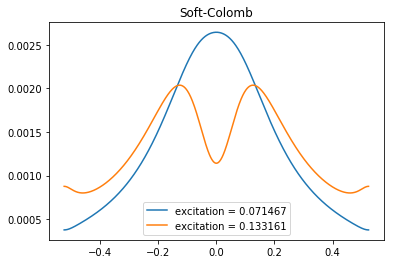

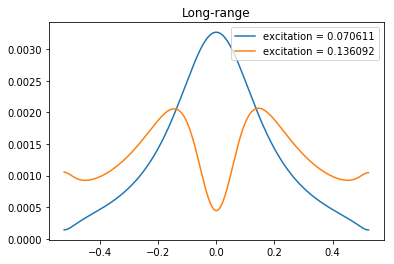

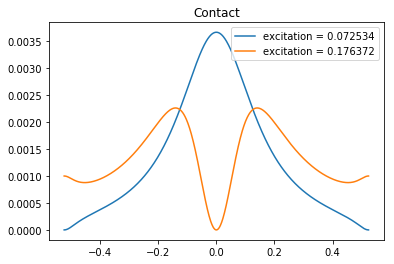

In [23]:
plt.rcParams['figure.figsize'] = [6,4]
for i in range (0,3):
    fig, ax = plt.subplots()
    num = 0
    while (fr[i,num].real < E_map[N//2,2] - E_map[N//2,1]):
        ax.plot(k_map, abs(v[i,:,num])**2, label='excitation = %(frec)f' % {"frec": fr[i,num].real})
        num = num + 1
    ax.legend()
    plt.title(name[i])
plt.show()

С помощью матричных элементов $\rho^{cv}_k(\omega)$, параметрически зависящих от частоты возмущения $\omega$, можно построить спектр поглощения моделируемой среды как мнимой части от макроскопической диэлектрической функции:

\begin{equation}
    \epsilon_M (\omega) = 1 - lim_{\mathbf{q} \rightarrow 0} v_{\mathbf{G} = 0} \sum_{\lambda} \frac{|\sum_{\mathbf{k}ij} <\psi^i_\mathbf{k}|e^{i\mathbf{qr}}|\psi^j_\mathbf{k}> \rho^{ij}_{\lambda \mathbf{k}}|^2}{\omega - \omega_{\lambda} + i\eta},
\end{equation}
где $\omega_{\lambda}$ и $\rho^{ij}_{\lambda}$ - собственные числа и собственные векторы, полученные из выражения (37); $\eta$ - сглаживающий параметр, позволяющий избегать возникновения сингулярностей в полученной функции; в нашей численной модели q - малый, но конечный параметр (на практике берется величина порядка $10^{-3}$). Сглаживающий параметр $\eta$ берется тем меньший, чем больше отрезков в разбиении первой зоны Бриллюэна - в рассматриваемой конфигурации достаточно параметра порядка $10^{-2}$. В случае рассмотрения только матричных элементов рождения возбужденного состояния $\rho^{cv}$ и пренебрежения девозбуждениями $\rho^{vc}$ в рамках аппроксимации Тамма-Данкова для одномерной задачи эта формула упрощается:

\begin{equation}
    \epsilon_M (\omega) = 1 - lim_{q \rightarrow 0} \frac{4 \pi}{q^2} \sum_{\lambda} \frac{|\sum_{k} <\psi^c_k|e^{iqr}|\psi^v_k> \rho^{cv}_{\lambda k}|^2}{\omega - \omega_{\lambda} + i\eta}.
\end{equation}

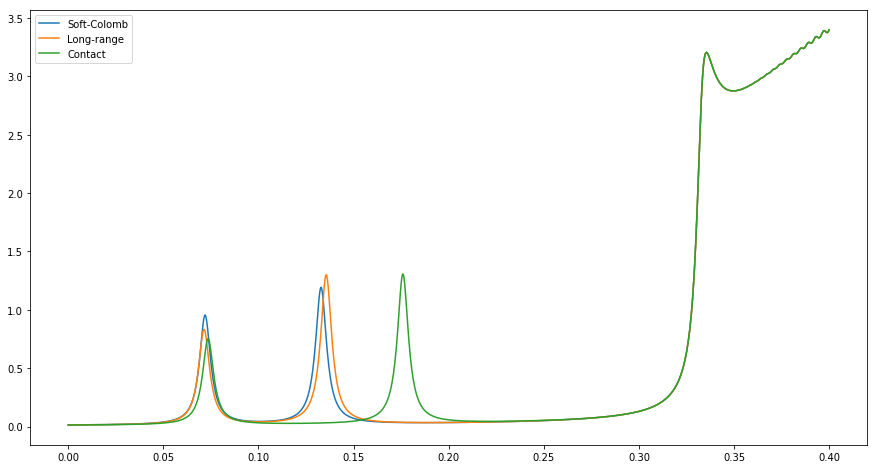

In [8]:
N_w = 1000
Spectra = []
plt.rcParams['figure.figsize'] = [15,8]
w_map = numpy.linspace(0., fr_end, N_w)
F_fr = numpy.zeros((3,N_w), dtype = complex)
ME = numpy.zeros(N, dtype = complex); Den = numpy.zeros(N, dtype = complex);
Exp = numpy.array([numpy.exp(-1.j*q*r_map,dtype=complex)]).T.dot(numpy.array([numpy.ones(N)]))
def integr(i):
    return simps(fi[:,i,1].conj()*fi[:,i,0]*Exp,dx=h,axis=0)/(a+b)
Int = numpy.fromfunction(integr,(N,), dtype = int)
for i in range (0,3):    
    ME = (Int * Int.conj()).dot(v[i] * v[i].conj())
    for w in range (0, N_w):
        Den[:] = (w_map[w] - fr[i,:] + 1.j * eta) ** (-1)
        F_fr[i,w] = 1 - 4 * numpy.pi * Den.dot(ME)
fig, ax = plt.subplots()
for i in range (0,3):
    ax.plot(w_map,F_fr[i].imag, label=name[i])
ax.legend(loc = 'upper left')
plt.show()